In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pickle

In [2]:
df = pd.read_json('https://storage.googleapis.com/msca-bdp-data-open/news/news_final_project.json', orient='records', lines=True) 
df.shape

(200119, 4)

In [3]:
df.isna().sum()

date        0
language    0
title       0
text        0
dtype: int64

In [4]:
df[df["language"] == "English"]
df.shape

(200119, 4)

In [5]:
df

,date,language,title,text
0,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...
1,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...
2,2022-01-06,english,Watch ‘Chicago P.D.’ Preview Wednesday,Chicago PD 9×11 “Lies” Season 9 Episode 11 Pro...
3,2022-01-06,english,Trump’s Solution for Chicago Public Schools? K...,Wise of Foolish?\nThe Chicago Tribune article ...
4,2022-01-06,english,"Family, friends, colleagues gathering today at...",The neighbors near Mashawn Plummer’s Portage P...
...,...,...,...,...
200114,2022-03-05,english,Chicago girl shot after celebrating 12th birth...,Authorities say a girl who was shot in the hea...
200115,2022-03-05,english,Loyola Chicago vs. Northern Iowa – MVC Tournam...,"The No. 4 seed Loyola Chicago Ramblers (23-7, ..."
200116,2022-03-05,english,"DraftKings Illinois Promo Code: $1,050 Bonus a...",Remember to check out the DraftKings Illinois ...
200117,2022-03-05,english,"Sidney, Illinois had a median home valuation o...",[BlockShopper.com] .\n|Buyer||Address||Valuati...


(array([23101., 19596., 19815., 23670., 19735., 18310., 18190., 17844.,
        18817., 21041.]),
 array([18993. , 19005.5, 19018. , 19030.5, 19043. , 19055.5, 19068. ,
        19080.5, 19093. , 19105.5, 19118. ]),
 <BarContainer object of 10 artists>)

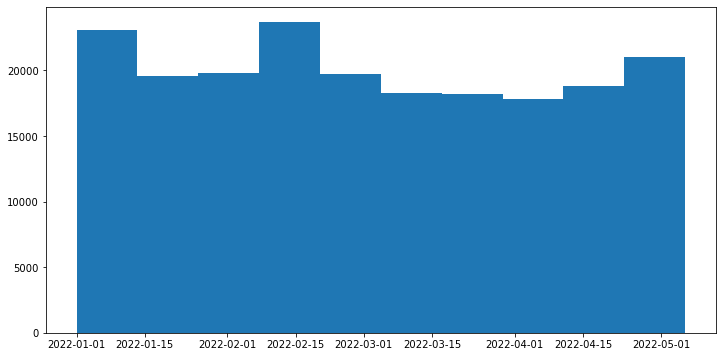

In [6]:
plt.rcParams["figure.figsize"] = (12,6)
plt.hist(df["date"])

In [7]:
#delete \n
df["text_clean"] = df["text"].apply(lambda x : re.sub("\n"," ",x))

#delete url
pattern = "((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*"
df["text_clean"] = df["text_clean"].apply(lambda x:re.sub(pattern,"",x))

#delete special characters, punctuation and numbers 
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', str(x)))

#to lower case
df["text_clean"] = df["text_clean"].apply(lambda x: x.lower())



In [8]:
df

,date,language,title,text,text_clean
0,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...
1,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...
2,2022-01-06,english,Watch ‘Chicago P.D.’ Preview Wednesday,Chicago PD 9×11 “Lies” Season 9 Episode 11 Pro...,chicago pd lies season episode pro...
3,2022-01-06,english,Trump’s Solution for Chicago Public Schools? K...,Wise of Foolish?\nThe Chicago Tribune article ...,wise of foolish the chicago tribune article t...
4,2022-01-06,english,"Family, friends, colleagues gathering today at...",The neighbors near Mashawn Plummer’s Portage P...,the neighbors near mashawn plummer s portage p...
...,...,...,...,...,...
200114,2022-03-05,english,Chicago girl shot after celebrating 12th birth...,Authorities say a girl who was shot in the hea...,authorities say a girl who was shot in the hea...
200115,2022-03-05,english,Loyola Chicago vs. Northern Iowa – MVC Tournam...,"The No. 4 seed Loyola Chicago Ramblers (23-7, ...",the no seed loyola chicago ramblers ...
200116,2022-03-05,english,"DraftKings Illinois Promo Code: $1,050 Bonus a...",Remember to check out the DraftKings Illinois ...,remember to check out the draftkings illinois ...
200117,2022-03-05,english,"Sidney, Illinois had a median home valuation o...",[BlockShopper.com] .\n|Buyer||Address||Valuati...,buyer address valuation jennifer a ...


In [12]:
df.to_pickle("clean_text.pkl")

In [3]:
df = pd.read_pickle("clean_text.pkl")

DBSCAN

In [4]:
from sklearn.feature_extraction.text import CountVectorizer


cv1 = CountVectorizer(stop_words="english")
count_matrix = cv1.fit_transform(df.text_clean)

In [10]:
count_matrix

<200119x247176 sparse matrix of type '<class 'numpy.int64'>'
	with 29772808 stored elements in Compressed Sparse Row format>

In [5]:
transformer = TfidfTransformer() 
text = transformer.fit_transform(count_matrix)

In [16]:
text

<200119x247176 sparse matrix of type '<class 'numpy.float64'>'
	with 29772808 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
distance_array = pairwise_distances(text, metric='cosine')

: 

: 

In [41]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=10).fit(text)
pickle.dump(clustering, open('DBSCAN_1_10.pkl', 'wb'))

In [6]:
clustering = pickle.load(open('DBSCAN_1_10.pkl', 'rb'))

In [7]:
labels = clustering.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
max(labels)

11

In [9]:
max_label = max(labels)
max_items = np.random.choice(range(text.shape[0]), size=5000, replace=False)
    
pca = PCA(n_components=3).fit_transform(text[max_items,:].todense())
pca_df = pd.DataFrame(pca, columns = ["1","2","3"])

In [10]:
pca_df["cluster"] = labels[max_items]
pca_df["cluster"].value_counts()

 0     4537
-1      449
 1        7
 11       1
 8        1
 7        1
 5        1
 10       1
 6        1
 3        1
Name: cluster, dtype: int64

In [11]:
df["cluster"] = labels
cnt = df["cluster"].value_counts().rename_axis('cluster').to_frame('counts')
cnt = cnt.transpose()
cnt

cluster,0,-1,1,2,6,8,3,4,7,9,5,11,10
counts,181871,17602,482,31,21,17,16,16,16,15,11,11,10


In [43]:
color=[10.0 if l == -1 else l for l in labels ]
color = np.array(color)
labels.size

200119

/var/folders/_4/d916rzgj7js5c5td2v3vn2nr0000gn/T/ipykernel_39496/1071246907.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


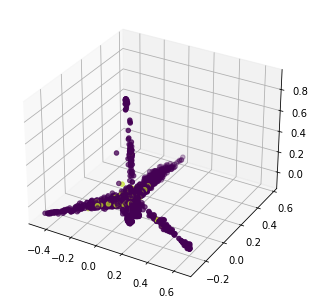

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca[:,2],pca[:,1],pca[:,0], c = color[max_items])


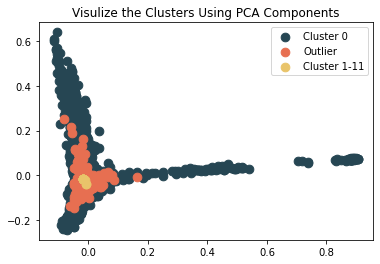

In [32]:
plt.scatter(pca_df[pca_df["cluster"] ==0]["1"], pca_df[pca_df["cluster"] ==0]["2"], s = 75, c= "#264653")
plt.scatter(pca_df[pca_df["cluster"] ==-1]["1"], pca_df[pca_df["cluster"] ==-1]["2"], s = 75, c= '#E76F51')
for i in range(1,12):
    plt.scatter(pca_df[pca_df["cluster"] ==i]["1"], pca_df[pca_df["cluster"] ==i]["2"], s = 75, c= "#E9C46A")
plt.title("Visulize the Clusters Using PCA Components")
plt.legend(["Cluster 0","Outlier","Cluster 1-11"])


In [33]:
tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(text[max_items,:].todense()))
tsne = pd.DataFrame(tsne, columns = ["1","2"])


In [34]:
tsne["cluster"] = labels[max_items]

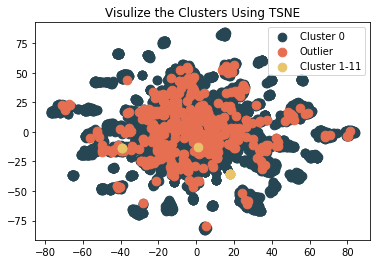

In [35]:
plt.scatter(tsne[tsne["cluster"] ==0]["1"], tsne[tsne["cluster"] ==0]["2"], s = 75, c= "#264653")
plt.scatter(tsne[tsne["cluster"] ==-1]["1"], tsne[tsne["cluster"] ==-1]["2"], s = 75, c= '#E76F51')
for i in range(1,12):
    plt.scatter(tsne[tsne["cluster"] ==i]["1"], tsne[tsne["cluster"] ==i]["2"], s = 75, c= "#E9C46A")
plt.title("Visulize the Clusters Using TSNE")
plt.legend(["Cluster 0","Outlier","Cluster 1-11"])

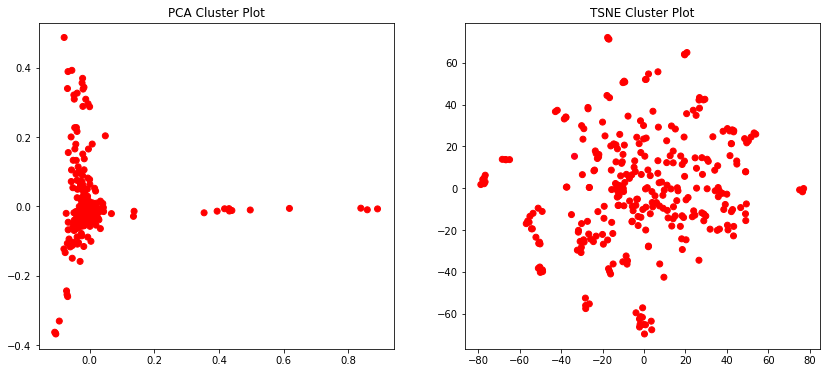

In [47]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, labels)
    

In [12]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 100,
    stop_words = 'english'
)
tfidf.fit(df.text_clean)
new_text = tfidf.transform(df.text_clean)

In [13]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(new_text, labels, tfidf.get_feature_names(), 20)


Cluster -1
best,school,work,news,business,police,home,day,years,city,state,just,people,year,like,time,new,said,illinois,chicago

Cluster 0
home,company,day,like,people,points,just,team,season,city,game,time,police,year,state,new,news,said,illinois,chicago

Cluster 1
law,know,just,information,friday,including,il,home,high,help,health,group,good,going,games,illinois,years,best,use,content

Cluster 2
like,lawyers,law,know,just,information,year,including,il,home,high,help,health,group,good,going,games,game,illinois,years

Cluster 3
high,years,health,group,games,going,help,good,year,like,know,don,th,friday,big,school,district,day,people,students

Cluster 4
lawyers,law,know,just,information,friday,including,il,home,high,help,health,group,going,games,illinois,years,good,old,really

Cluster 5
lawyers,law,just,information,free,including,home,high,help,health,group,good,going,games,game,il,illinois,use,know,need

Cluster 6
like,lawyers,law,know,just,information,year,including,il,home,high,help,

In [22]:
pd.set_option('display.max_colwidth', None)

In [37]:
df.to_pickle("cluster.pkl")

In [4]:
df = pd.read_pickle("cluster.pkl")

In [6]:
pd.set_option('display.max_colwidth', None)
df[df["cluster"]==1]

,date,language,title,text,text_clean,cluster
98,2022-02-10,english,No. 7/6 Indiana Rolls To Road Win At Illinois,Thanks for visiting\nThe use of software that blocks ads hinders our ability to serve you the content you came here to enjoy.\nWe ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here.\nThank you for your support!,thanks for visiting the use of software that blocks ads hinders our ability to serve you the content you came here to enjoy we ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here thank you for your support,1
1329,2022-04-28,english,Illinois Set to Wrap Regular Season at Drake Relays,Thanks for visiting\nThe use of software that blocks ads hinders our ability to serve you the content you came here to enjoy.\nWe ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here.\nThank you for your support!,thanks for visiting the use of software that blocks ads hinders our ability to serve you the content you came here to enjoy we ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here thank you for your support,1
1565,2022-01-06,english,Women’s Basketball Outlasts Northern Illinois In Overtime,Thanks for visiting\nThe use of software that blocks ads hinders our ability to serve you the content you came here to enjoy.\nWe ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here.\nThank you for your support!,thanks for visiting the use of software that blocks ads hinders our ability to serve you the content you came here to enjoy we ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here thank you for your support,1
1874,2022-04-08,english,Women’s Tennis Prepares for Split Weekend Traveling to Indiana and Hosting No. 50 Illinois,Thanks for visiting\nThe use of software that blocks ads hinders our ability to serve you the content you came here to enjoy.\nWe ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here.\nThank you for your support!,thanks for visiting the use of software that blocks ads hinders our ability to serve you the content you came here to enjoy we ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here thank you for your support,1
2321,2022-04-08,english,Illinois Travels to Iowa for Weekend Series,Thanks for visiting\nThe use of software that blocks ads hinders our ability to serve you the content you came here to enjoy.\nWe ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here.\nThank you for your support!,thanks for visiting the use of software that blocks ads hinders our ability to serve you the content you came here to enjoy we ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here thank you for your support,1
...,...,...,...,...,...,...
198105,2022-02-18,english,"Illinois Home to Face Duke, Northern Kentucky and UNC",Thanks for visiting\nThe use of software that blocks ads hinders our ability to serve you the content you came here to enjoy.\nWe ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here.\nThank you for your support!,thanks for visiting the use of software that blocks ads hinders our ability to serve you the content you came here to enjoy we ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here thank you for your support,1
198267,2022-02-02,english,Illinois Finishes Signing Day Class,Thanks for visiting\nThe use of softwa

In [25]:
outlier = df[df["cluster"]==-1]
outlier.shape

(18210, 6)

In [31]:
cluster_0 = df[df["cluster"]==0]
cluster_1 = df[df["cluster"]==1]

In [27]:
pd.set_option('display.max_colwidth', None)

In [38]:
outlier


date language  \
31     2022-04-27  english   
33     2022-04-27  english   
49     2022-05-03  english   
53     2022-05-03  english   
63     2022-01-11  english   
...           ...      ...   
200045 2022-04-19  english   
200050 2022-03-30  english   
200055 2022-03-31  english   
200081 2022-04-19  english   
200082 2022-04-19  english   

                                                                                                                                                             title  \
31                                                                                                                                            About Chicago Church   
33                                                                                            Chicago White Sox provide significant updates on players - NewsBreak   
49                                                                                     Expect more rainy, gloomy weather in Chicago today but warmth is on the way   
53                                                                                      A month away from Illinois’ primary election, here’s what you need to know   
63                                                                                            The Chicago Bears mess is reminiscent of the Cubs under the Wrigleys   
...                                                                                                                                                            ...   
200045                                                    7th Cir. Affirms Summary Judgment On Illinois Whistleblower Act and Illinois Jury Act Retaliation Claims   
200050                                                                    Toronto Blue Jays sign Dexter Fowler Chicago Cubs St. Louis Cardinals Los Angeles Angels   
200055                                                                         Chicago non-profit COFI celebrating record $2 million donation from Mackenzie Scott   
200081                                                                   It Seems Unlikely Musk Will Get Private Equity Funding for Twitter Purchase – NBC Chicago   
200082  After Cook County judges and prosecutors step aside, special prosecutors named in cases linked to allegations of misconduct by ex-Chicago police detective   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [37]:
cluster_1

,date,language,title,text,text_clean,cluster
98,2022-02-10,english,No. 7/6 Indiana Rolls To Road Win At Illinois,Thanks for visiting\nThe use of software that blocks ads hinders our ability to serve you the content you came here to enjoy.\nWe ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here.\nThank you for your support!,thanks for visiting the use of software that blocks ads hinders our ability to serve you the content you came here to enjoy we ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here thank you for your support,1
1329,2022-04-28,english,Illinois Set to Wrap Regular Season at Drake Relays,Thanks for visiting\nThe use of software that blocks ads hinders our ability to serve you the content you came here to enjoy.\nWe ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here.\nThank you for your support!,thanks for visiting the use of software that blocks ads hinders our ability to serve you the content you came here to enjoy we ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here thank you for your support,1
1565,2022-01-06,english,Women’s Basketball Outlasts Northern Illinois In Overtime,Thanks for visiting\nThe use of software that blocks ads hinders our ability to serve you the content you came here to enjoy.\nWe ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here.\nThank you for your support!,thanks for visiting the use of software that blocks ads hinders our ability to serve you the content you came here to enjoy we ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here thank you for your support,1
1874,2022-04-08,english,Women’s Tennis Prepares for Split Weekend Traveling to Indiana and Hosting No. 50 Illinois,Thanks for visiting\nThe use of software that blocks ads hinders our ability to serve you the content you came here to enjoy.\nWe ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here.\nThank you for your support!,thanks for visiting the use of software that blocks ads hinders our ability to serve you the content you came here to enjoy we ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here thank you for your support,1
2321,2022-04-08,english,Illinois Travels to Iowa for Weekend Series,Thanks for visiting\nThe use of software that blocks ads hinders our ability to serve you the content you came here to enjoy.\nWe ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here.\nThank you for your support!,thanks for visiting the use of software that blocks ads hinders our ability to serve you the content you came here to enjoy we ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here thank you for your support,1
...,...,...,...,...,...,...
198105,2022-02-18,english,"Illinois Home to Face Duke, Northern Kentucky and UNC",Thanks for visiting\nThe use of software that blocks ads hinders our ability to serve you the content you came here to enjoy.\nWe ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here.\nThank you for your support!,thanks for visiting the use of software that blocks ads hinders our ability to serve you the content you came here to enjoy we ask that you consider turning off your ad blocker so we can deliver you the best experience possible while you are here thank you for your support,1
198267,2022-02-02,english,Illinois Finishes Signing Day Class,Thanks for visiting\nThe use of softwa

In [33]:
cluster_0.head(5)

date language  \
0 2022-01-06  english   
1 2022-01-06  english   
2 2022-01-06  english   
3 2022-01-06  english   
4 2022-01-06  english   

                                                                                                                                 title  \
0                                                                            No deal, no school: Chicago cancels classes for a 2nd day   
1                                               No deal, no school: Chicago cancels classes for a 2nd day | National | couriernews.com   
2                                                                                               Watch ‘Chicago P.D.’ Preview Wednesday   
3                                                                       Trump’s Solution for Chicago Public Schools? King Solomon Blog   
4  Family, friends, colleagues gathering today at South Side church to attend funeral services for Chicago firefighter Mashawn Plummer   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Kmeans

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 100,
    stop_words = 'english'
)

tfidf = TfidfVectorizer() 
text = tfidf.fit_transform(df.text_clean)

In [ ]:
iters = range(5, 10, 2)
    
sse = []
for k in iters:
    sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(text).inertia_)
    print('Fit {} clusters'.format(k))
        
f, ax = plt.subplots(1, 1)
ax.plot(iters, sse, marker='o')
ax.set_xlabel('Cluster Centers')
ax.set_xticks(iters)
ax.set_xticklabels(iters)
ax.set_ylabel('SSE')
ax.set_title('SSE by Cluster Center Plot')

In [ ]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)